<a href="https://colab.research.google.com/github/guptamanishacs/manisha80/blob/main/T080_(prac_10_data_visualization_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [9]:
uploaded.keys()


dict_keys(['healthcare-dataset-stroke-data (1).csv'])

In [10]:
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data (1).csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


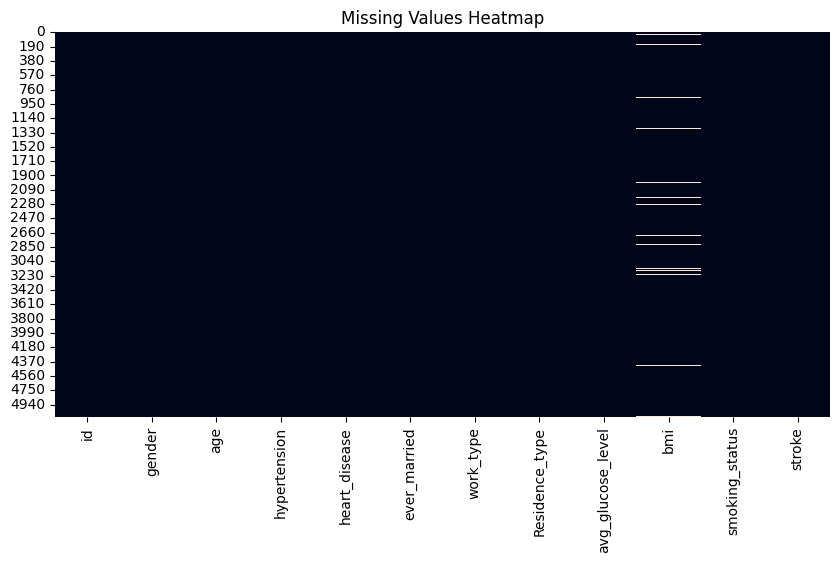

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


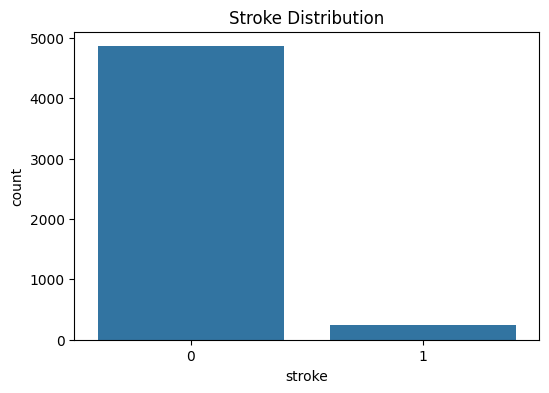

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution")
plt.show()


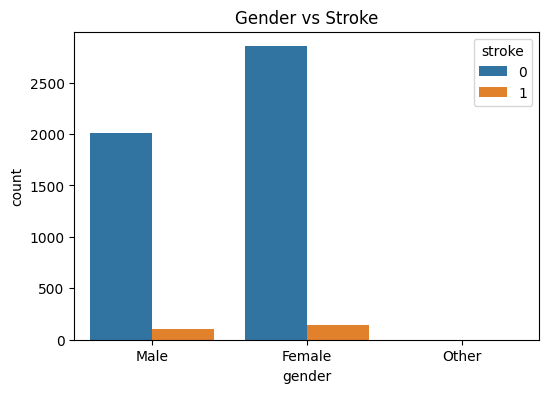

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title("Gender vs Stroke")
plt.show()


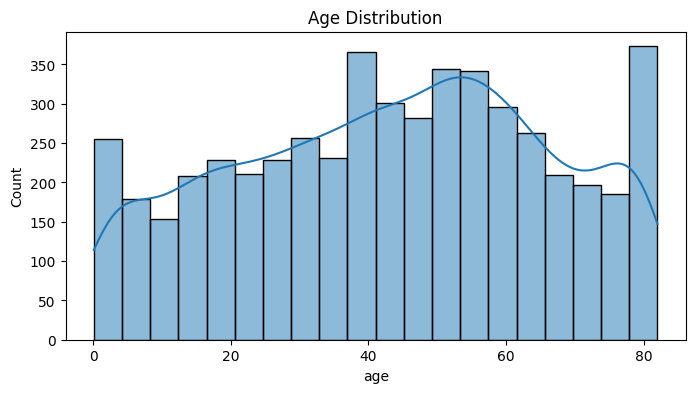

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


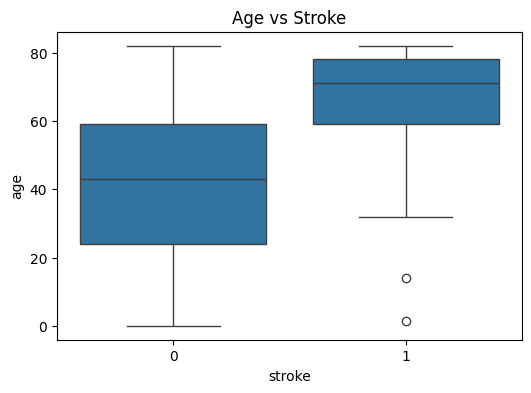

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age vs Stroke")
plt.show()


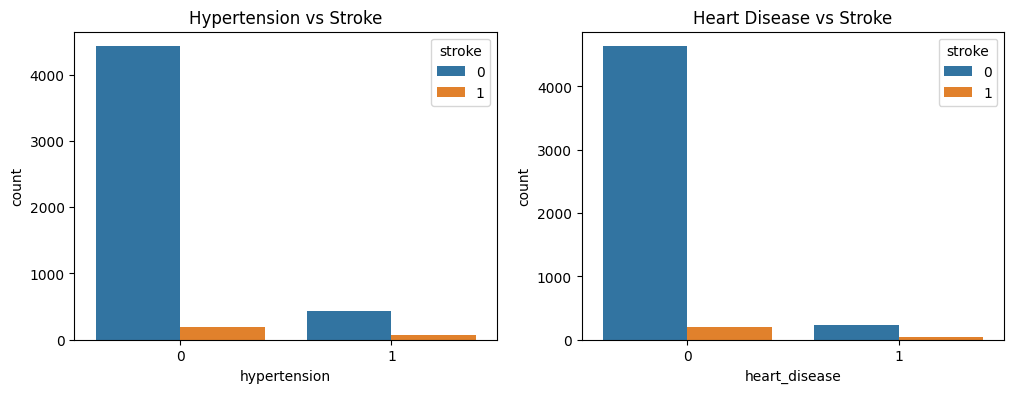

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x='hypertension', hue='stroke', data=df, ax=ax[0])
ax[0].set_title("Hypertension vs Stroke")

sns.countplot(x='heart_disease', hue='stroke', data=df, ax=ax[1])
ax[1].set_title("Heart Disease vs Stroke")

plt.show()


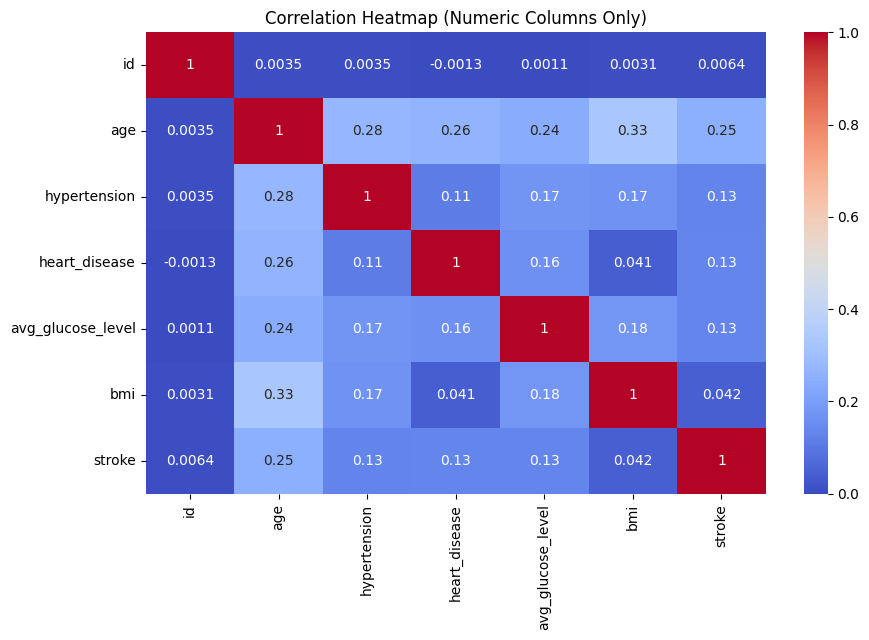

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


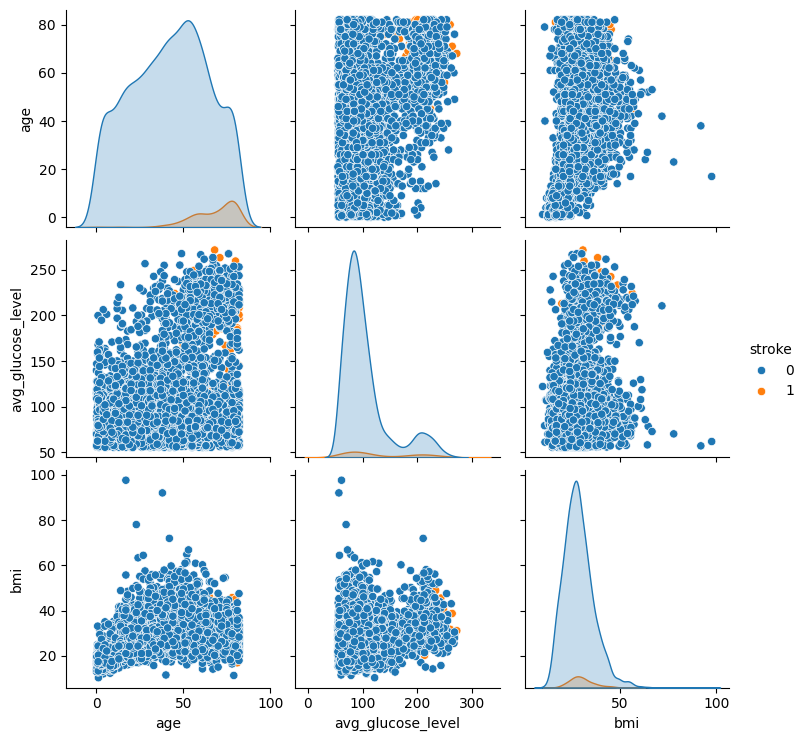

In [20]:
sns.pairplot(df[['age','avg_glucose_level','bmi','stroke']], hue='stroke')
plt.show()


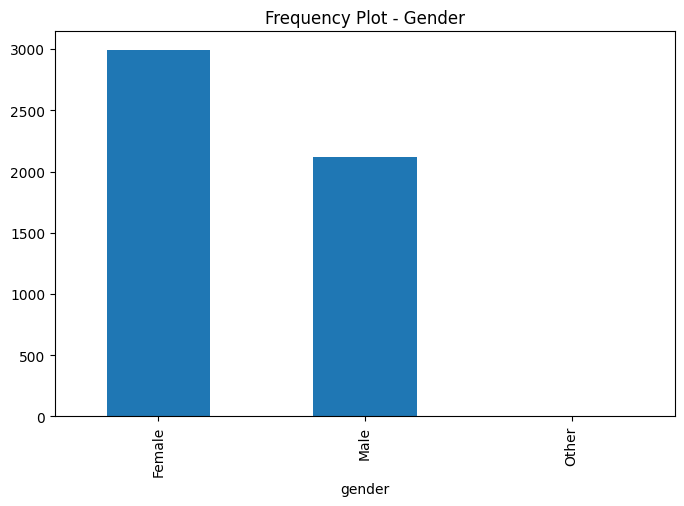

In [21]:
plt.figure(figsize=(8,5))
df['gender'].value_counts().plot(kind='bar')
plt.title("Frequency Plot - Gender")
plt.show()


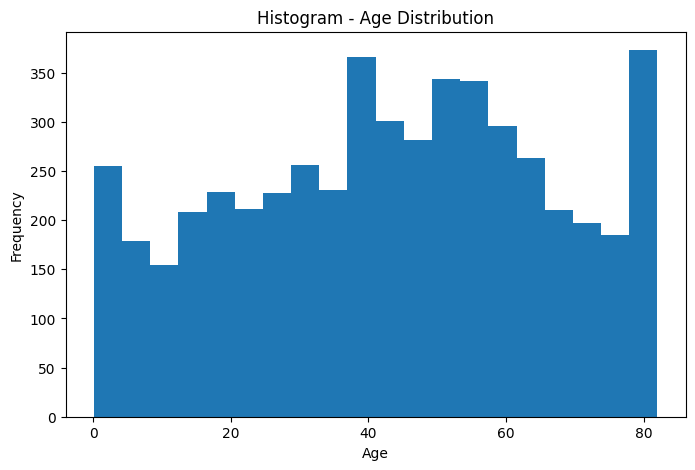

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20)
plt.title("Histogram - Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


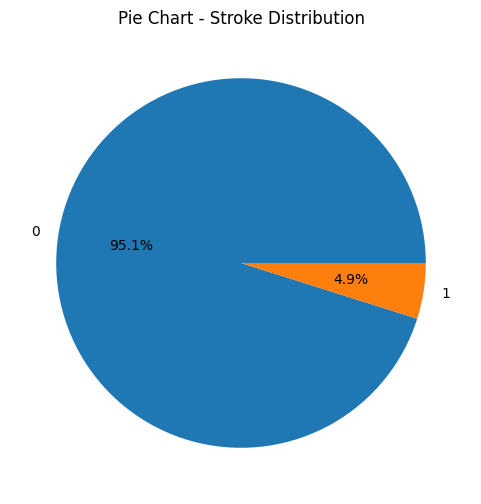

In [23]:
plt.figure(figsize=(6,6))
df['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie Chart - Stroke Distribution")
plt.ylabel("")
plt.show()


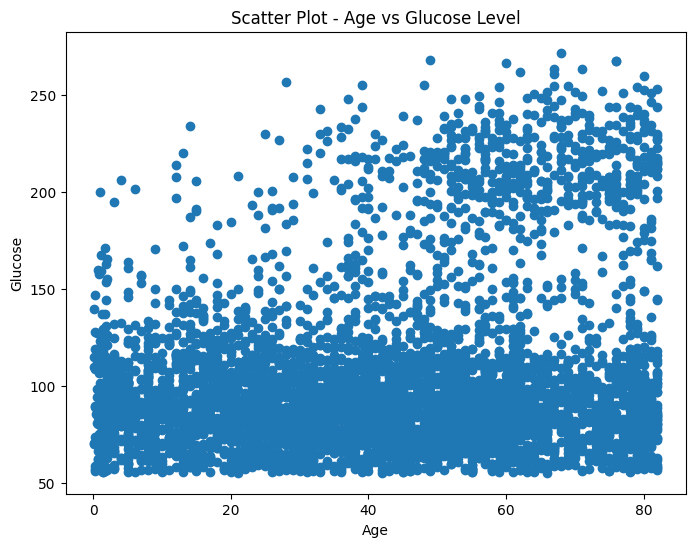

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['avg_glucose_level'])
plt.title("Scatter Plot - Age vs Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()


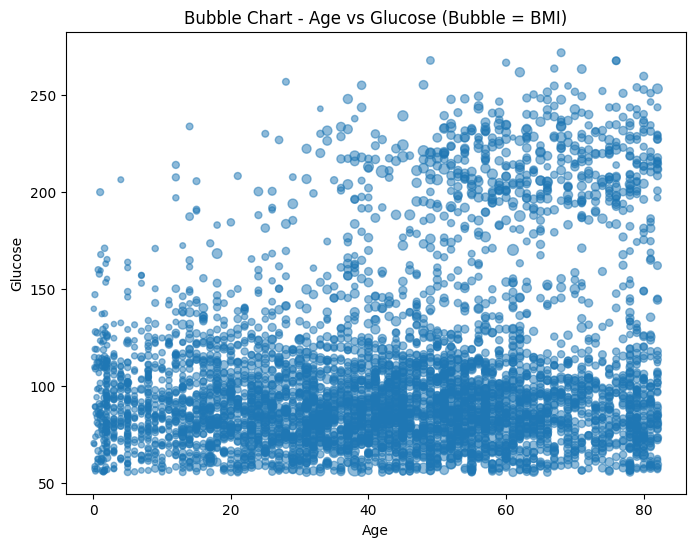

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['avg_glucose_level'], s=df['bmi'], alpha=0.5)
plt.title("Bubble Chart - Age vs Glucose (Bubble = BMI)")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()


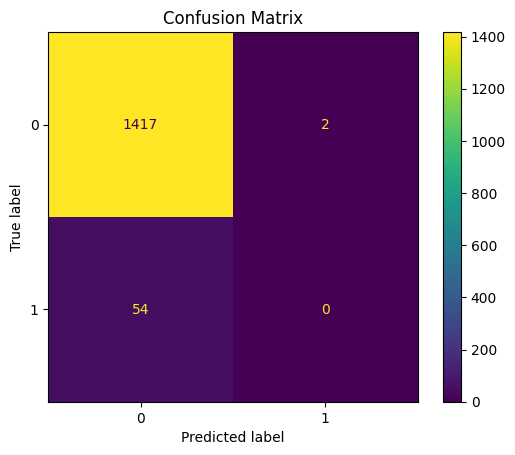

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

df2 = df.copy()
df2 = df2.dropna()

# Encode categoricals
for col in df2.select_dtypes('object').columns:
    df2[col] = LabelEncoder().fit_transform(df2[col])

X = df2.drop('stroke', axis=1)
y = df2['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


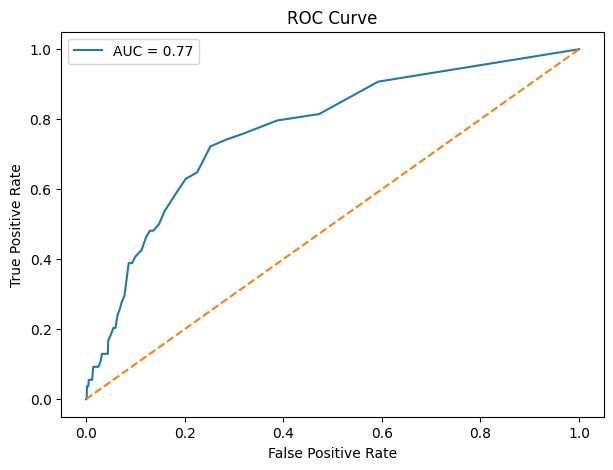

In [28]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


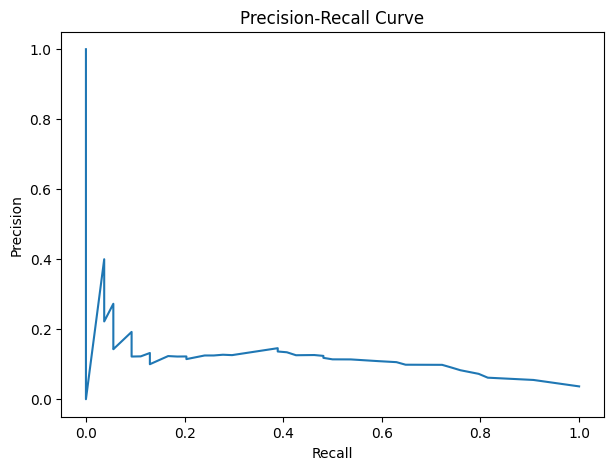

In [29]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


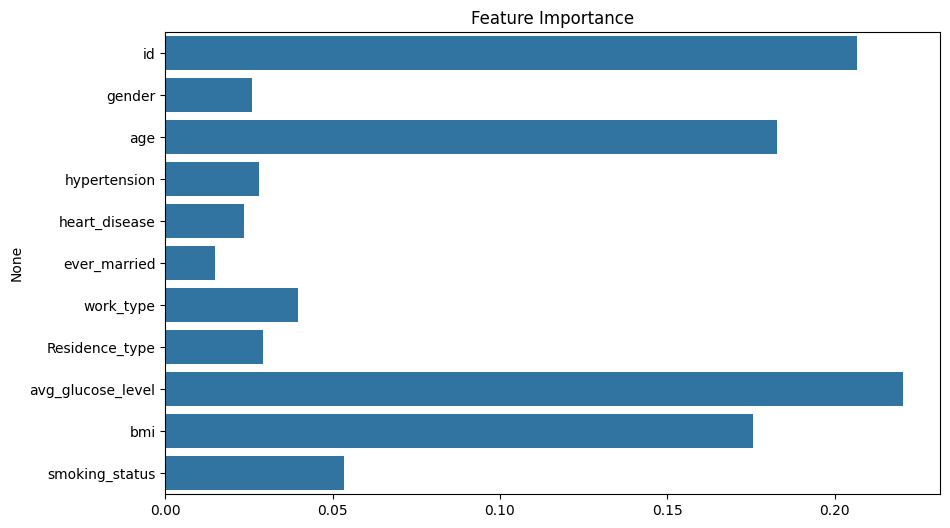

In [30]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


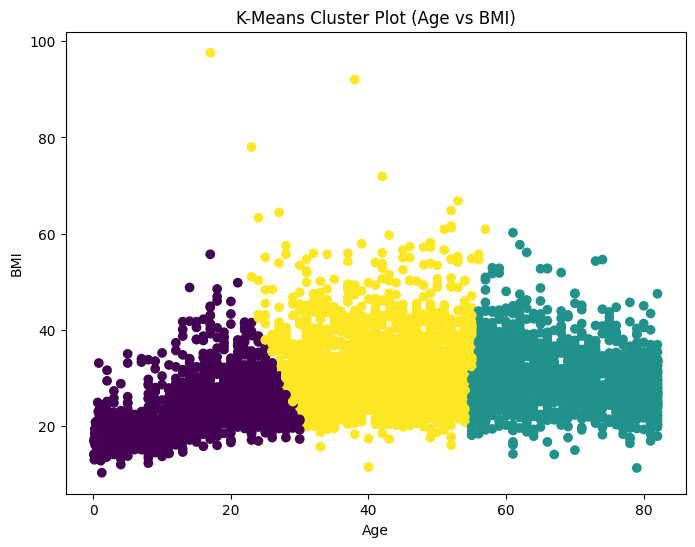

In [31]:
from sklearn.cluster import KMeans

cluster_df = df_numeric[['age','bmi']].dropna()

kmeans = KMeans(n_clusters=3)
cluster_df['cluster'] = kmeans.fit_predict(cluster_df[['age','bmi']])

plt.figure(figsize=(8,6))
plt.scatter(cluster_df['age'], cluster_df['bmi'], c=cluster_df['cluster'])
plt.title("K-Means Cluster Plot (Age vs BMI)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()
